In [1]:
from convert import convert_drone_log_to_csv
convert_drone_log_to_csv()

Log file Mon May  8 15_18_33 2023 is empty
Log file Sat May  6 15_20_23 2023 is empty
Log file Sat May  6 15_20_28 2023 is empty
Log file Tue May  2 16_56_14 2023 uses old format
Log file Tue May  9 13_21_15 2023 is empty
Log file Wed Apr 26 15_36_59 2023 uses old format
Log file Wed Apr 26 15_37_44 2023 uses old format
Log file Wed Apr 26 15_39_14 2023 uses old format
Log file Wed Apr 26 15_40_03 2023 uses old format
Log file Wed Apr 26 15_41_16 2023 uses old format
Log file Wed Apr 26 15_42_29 2023 uses old format
Log file Wed May  3 14_05_15 2023 uses old format
Log file Tue May  2 16_56_14 2023 uses old format
Log file Wed Apr 26 15_36_59 2023 uses old format
Log file Wed Apr 26 15_37_44 2023 uses old format
Log file Wed Apr 26 15_39_14 2023 uses old format
Log file Wed Apr 26 15_40_03 2023 uses old format
Log file Wed Apr 26 15_41_16 2023 uses old format
Log file Wed Apr 26 15_42_29 2023 uses old format
Log file Wed May  3 14_05_15 2023 uses old format


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from convert import convert_log_to_csv
import glob
import os


logs = glob.glob('.\\data\\*-log.csv')
headers = glob.glob('.\\data\\*-header.csv')

# Sort the logs and headers so that they match up
logs.sort()
headers.sort()



#print(files)
# Get filename only
log_file_names = [(x.split('\\')[-1])[:-4] for x in logs]
#subplots = ['Time', 'X', 'Y', 'Z', 'Pitch', 'Yaw', 'Roll', 'errorHeight', 'errorRoll', 'errorPitch', 'errorYaw']


In [3]:
# Plot each log file
for i,lg in enumerate(logs):
    # Plot error height against time
    df = pd.read_csv(lg)

    df_header = pd.read_csv(headers[i])
    #print(df)
    #print(log_file_names[i])
    #print(df['Time'])
    #print(log_file_names[i])
    df = df.astype(float)
    df_header = df_header.astype(float)
    #print(log_file_names[i])
    #print(df['Time'])
    #exit()

    # Make a new folder in plots for each log file if folder does not exist
    if not os.path.exists('.\\plots\\'+ log_file_names[i]):
        os.mkdir('.\\plots\\'+ log_file_names[i])

    subplots = df.keys()

    for sp in subplots:
        ref = (float)(df_header['ctrl_h->ref'])
        plt.plot(df['Time'], df[sp], label=sp)
        plt.xlabel('Time (s)')
        plt.ylabel(f'{sp}')

        # Make background white
        
        #ctrl_h->ref, ctrl_h->kp, ctrl_h->tau_i, ctrl_h->tau_d, ctrl_h->alpha
        config = 'kp:' + df_header['ctrl_h->kp'].apply(str) + ' tau_i:' + df_header['ctrl_h->tau_i'].apply(str) + ' tau_d:' + df_header['ctrl_h->tau_d'].apply(str) + ' alpha:' + df_header['ctrl_h->alpha'].apply(str)
        #print(config.astype(str).to_string())
        plt.title(config.astype(str).to_string())
        plt.grid(True)

        # High resolution
        plt.gcf().set_size_inches(18.5, 10.5)


        plt.savefig('.\\plots\\'+ log_file_names[i] + '\\' +sp+'.png', format='png', transparent=False, facecolor='white')

        # clear the plot
        plt.clf()


#df = pd.read_csv('./Wed-May-3-14_29_37-2023.csv', names=columns)

# Plot errorHeight against time
#plt.plot(df['Time'], df['errorHeight'])
#plt.xlabel('Time (s)')
#plt.ylabel('Error Height (m)')
#plt.title('Error Height vs Time')
#plt.show()

<Figure size 1332x756 with 0 Axes>

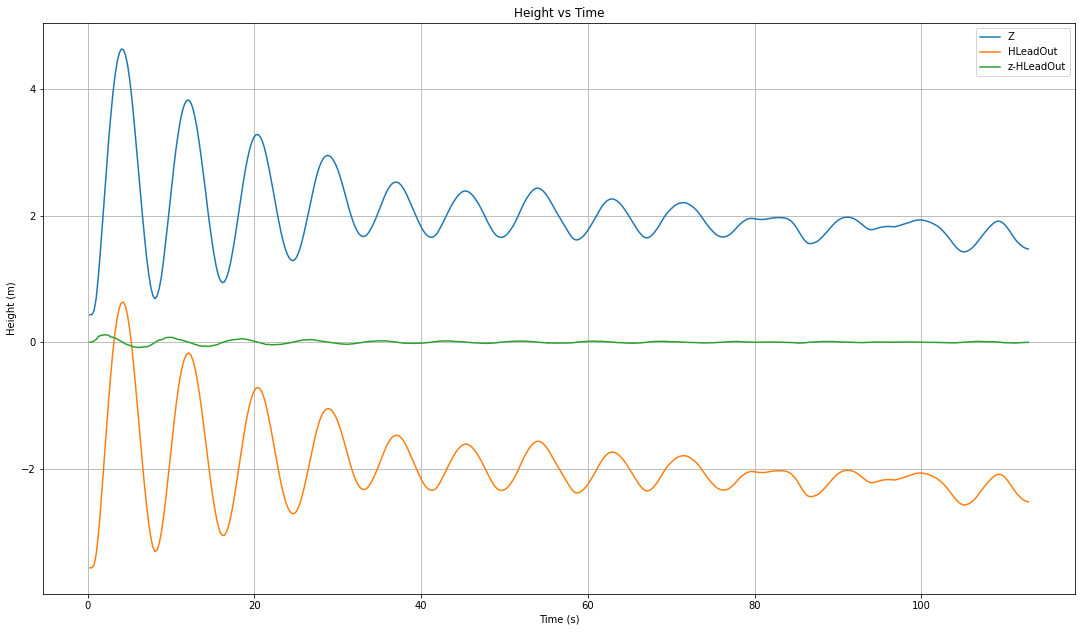

In [4]:
log = '.\\data\\Mon May  8 18_00_02 2023-log.csv'
#header = 'Mon May  8 18_00_02 2023-header.csv'
df = pd.read_csv(log)

# Get filename
log_file_name = (log.split('\\')[-1])[:-4]

# Plot z against time and HLeadOut against time
plt.plot(df['Time'], df['Z'], label='Z')
plt.plot(df['Time'], df['HLeadOut']-4, label='HLeadOut')
plt.plot(df['Time'], df['Z'] - df['HLeadOut'], label='z-HLeadOut')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time')
# Add grid
plt.grid(True)
# High resolution
plt.gcf().set_size_inches(18.5, 10.5)
plt.legend()
plt.show()